# Example: Exploratory Data Analysis with Pandas

---

In this activity, you will explore and analyze a dummy dataset to practice various aspects of exploratory data analysis, descriptive statistics, and data summarization. You will use Pandas and visualization techniques to gain insights into the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
filename = "sales-data.csv"
df = pd.read_csv(filename)

# Display the first few rows of the dataset
df.head()

,OrderDate,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,2011-01-04T00:00:00.000Z,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,2011-01-06T00:00:00.000Z,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


In [3]:
df.shape

(9994, 28)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrderDate            9994 non-null   object 
 1   Category             9994 non-null   object 
 2   City                 9994 non-null   object 
 3   Country              9994 non-null   object 
 4   CustomerName         9994 non-null   object 
 5   Discount             9994 non-null   float64
 6   OrderID              9994 non-null   object 
 7   PostalCode           9994 non-null   int64  
 8   ProductName          9994 non-null   object 
 9   Profit               9994 non-null   int64  
 10  Quantity             9994 non-null   int64  
 11  Region               9994 non-null   object 
 12  Sales                9994 non-null   int64  
 13  Segment              9994 non-null   object 
 14  ShipDate             9994 non-null   object 
 15  ShipMode             9994 non-null   o

In [4]:
# Check for empty columns
empty_columns = df.columns[df.isna().all()]

# Drop empty columns
df = df.drop(empty_columns, axis=1)

In [5]:
# Display basic statistics for numerical columns
df.describe()


,Discount,PostalCode,Profit,Quantity,Sales,DaystoShipActual,SalesForecast,DaystoShipScheduled,SalesperCustomer,ProfitRatio,latitude,longitude
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.156203,55190.379428,28.651891,3.789574,229.873324,3.958875,301.200620,4.320692,229.857992,12.037092,37.787222,-94.360212
std,0.206452,32063.693350,234.255712,2.225110,623.248946,1.747097,816.700059,2.176059,623.245119,46.677878,4.884539,18.058618
min,0.000000,1040.000000,-6600.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.440000,-275.000000,25.476600,-123.099800
25%,0.000000,23223.000000,2.000000,2.000000,17.000000,3.000000,23.000000,3.000000,17.280000,7.500000,34.011600,-117.252100
50%,0.200000,56430.500000,9.000000,3.000000,54.500000,4.000000,71.000000,6.000000,54.490000,27.000000,38.790200,-87.761150
75%,0.200000,90008.000000,29.000000,5.000000,210.000000,5.000000,275.000000,6.000000,209.940000,36.300000,40.801100,-77.394800
max,0.800000,99301.000000,8400.000000,14.000000,22638.000000,7.000000,29665.000000,6.000000,22638.480000,50.000000,48.797400,-68.791800


In [6]:
# Count of unique values in each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n{df[col].value_counts()}\n")



OrderDate:
OrderDate
2013-09-06T00:00:00.000Z    38
2014-09-03T00:00:00.000Z    36
2013-11-11T00:00:00.000Z    35
2014-12-02T00:00:00.000Z    34
2014-12-03T00:00:00.000Z    34
                            ..
2013-03-01T00:00:00.000Z     1
2013-03-08T00:00:00.000Z     1
2013-03-31T00:00:00.000Z     1
2013-04-03T00:00:00.000Z     1
2013-02-03T00:00:00.000Z     1
Name: count, Length: 1238, dtype: int64


Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


City:
City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Holyoke            1
Yucaipa            1
Murrieta           1
Antioch            1
Danbury            1
Name: count, Length: 531, dtype: int64


Country:
Country
United States    9994
Name: count, dtype: int64


CustomerName:
CustomerName
William Brown       37
Matt Abelman        34
Paul Prost          34
John Lee            34
Seth Ve

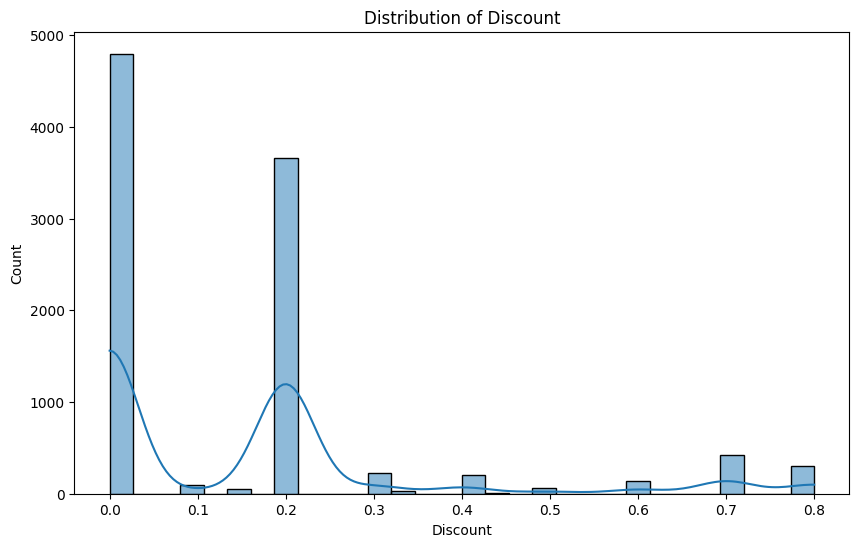

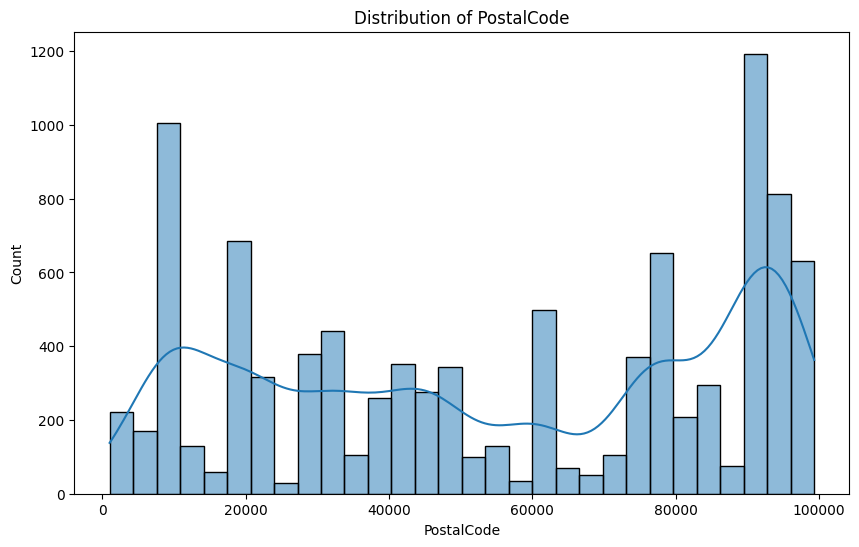

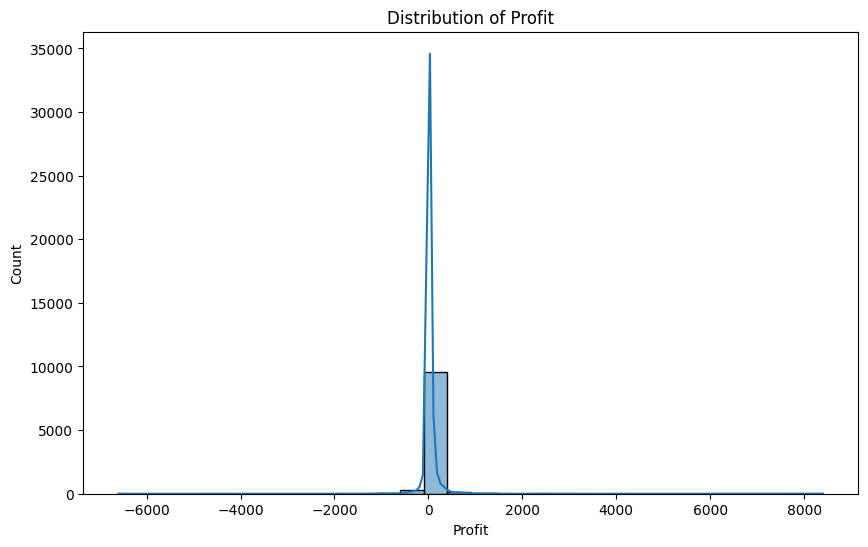

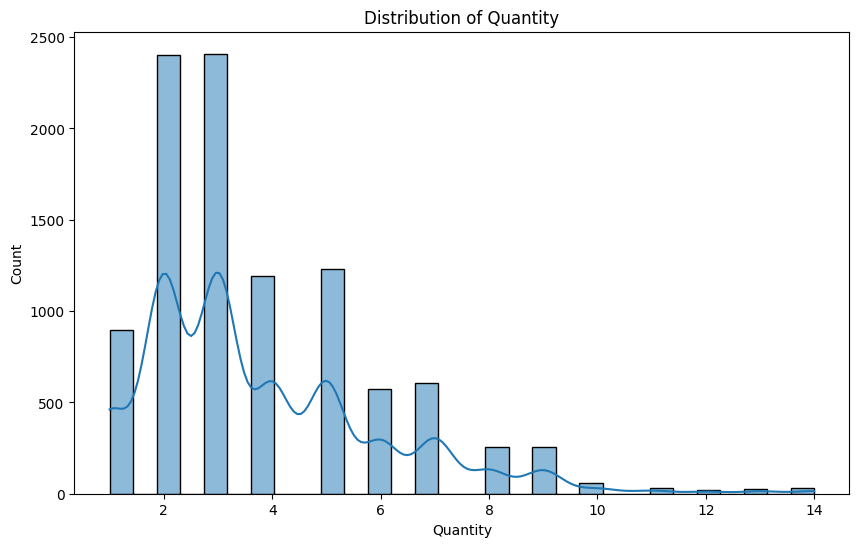

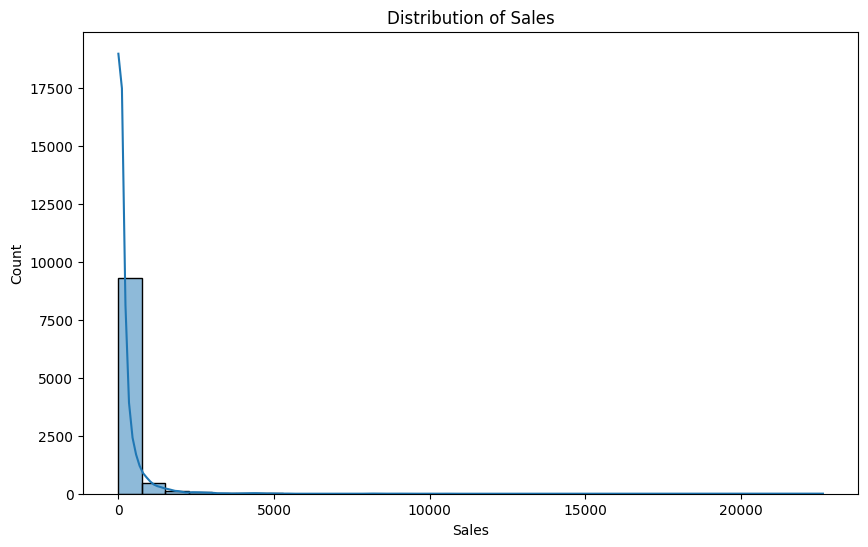

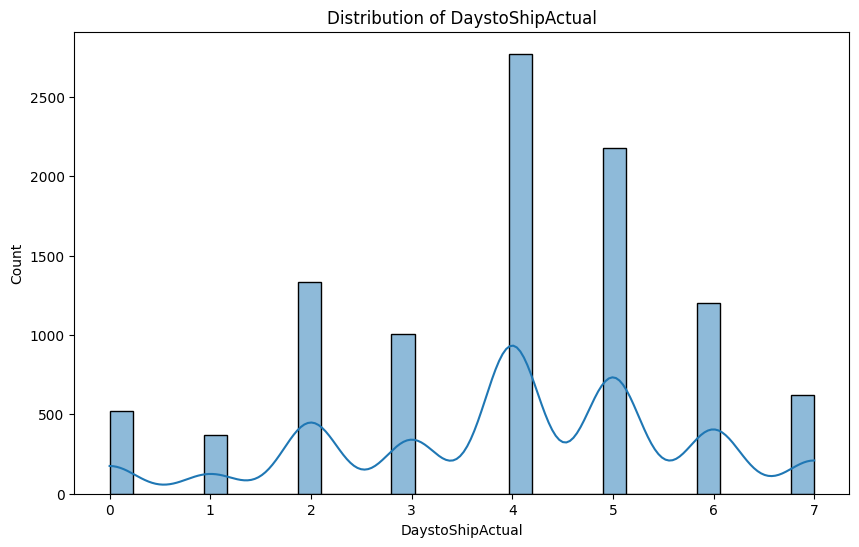

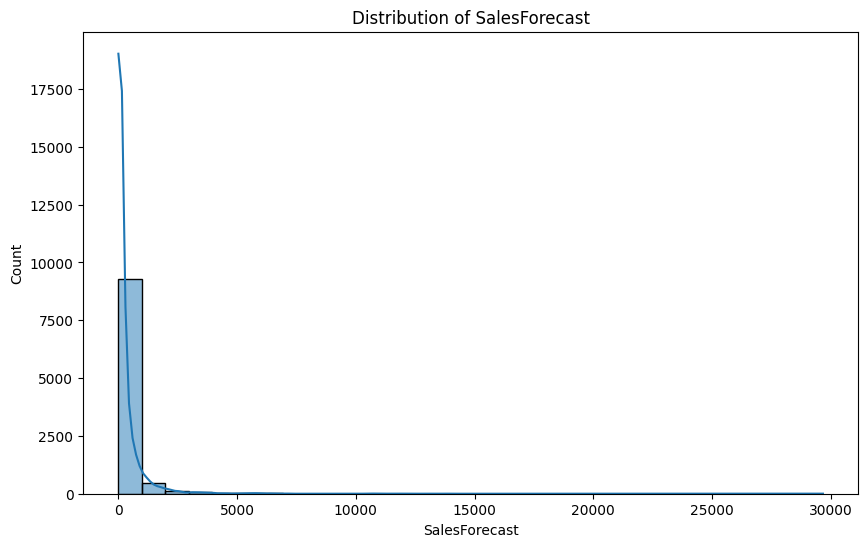

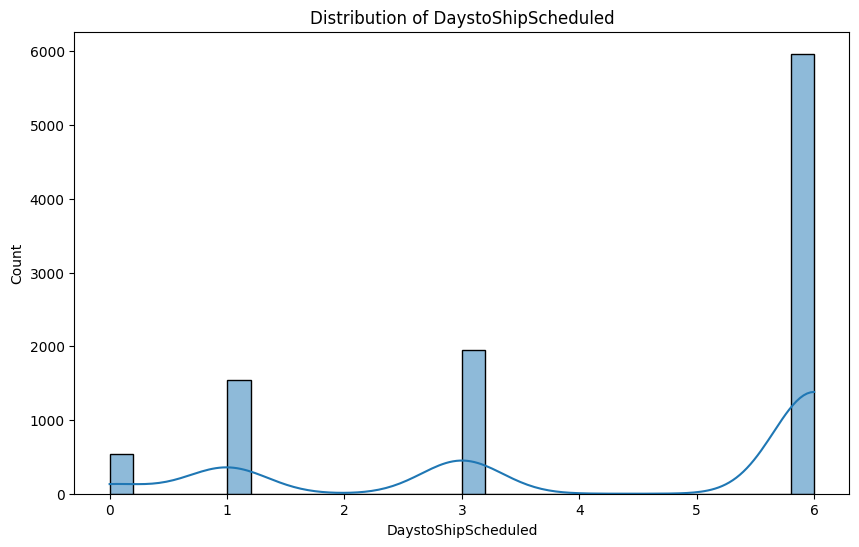

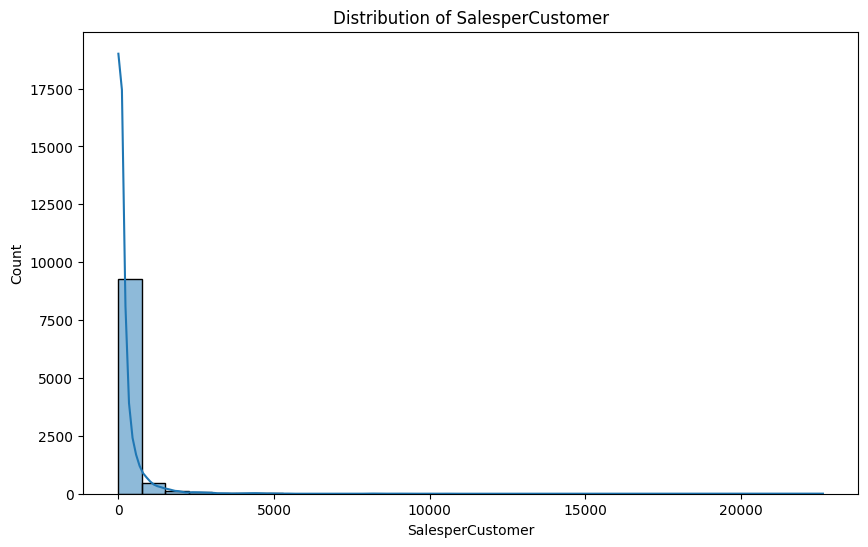

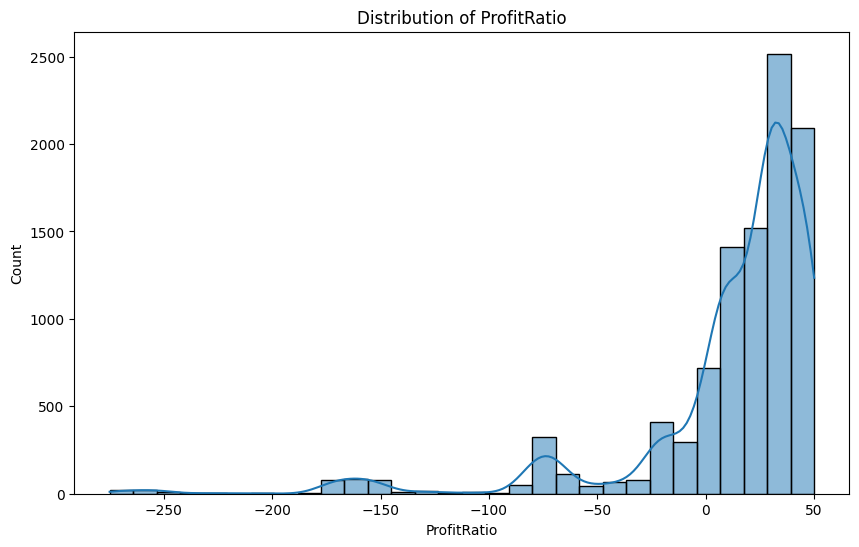

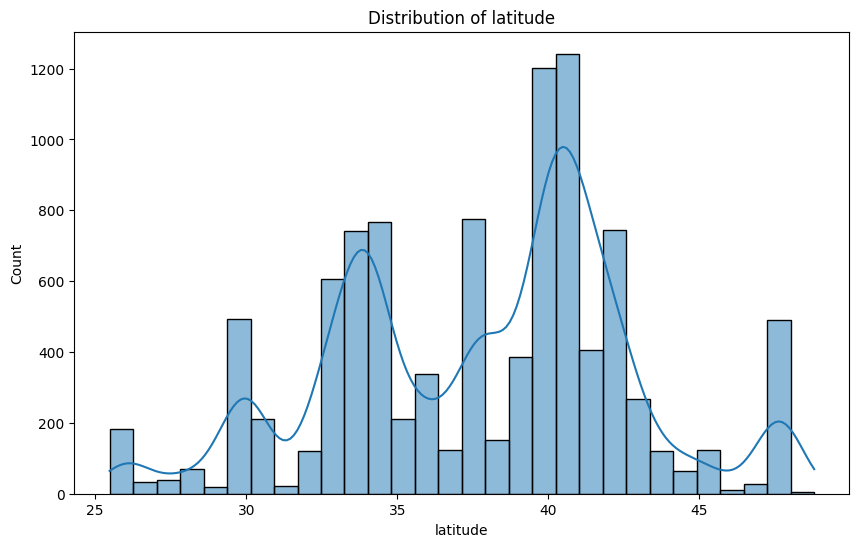

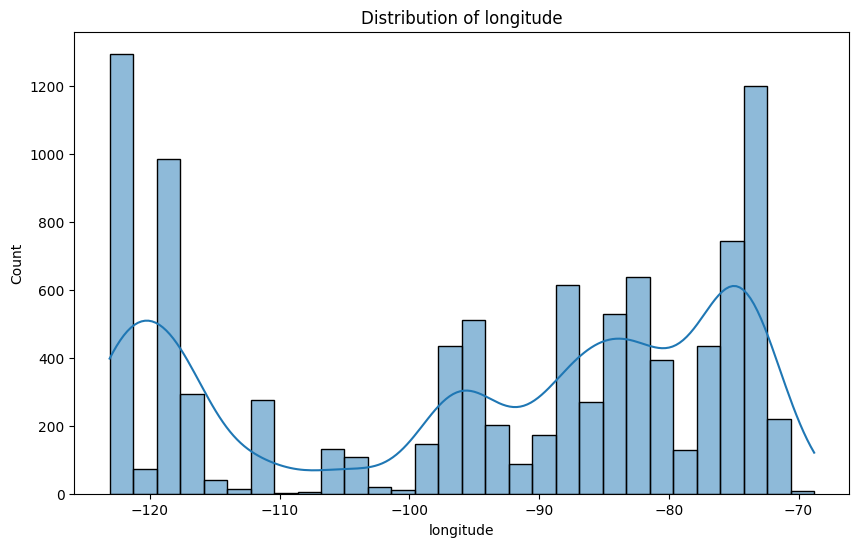

In [6]:
# Distribution of numerical columns
for col in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


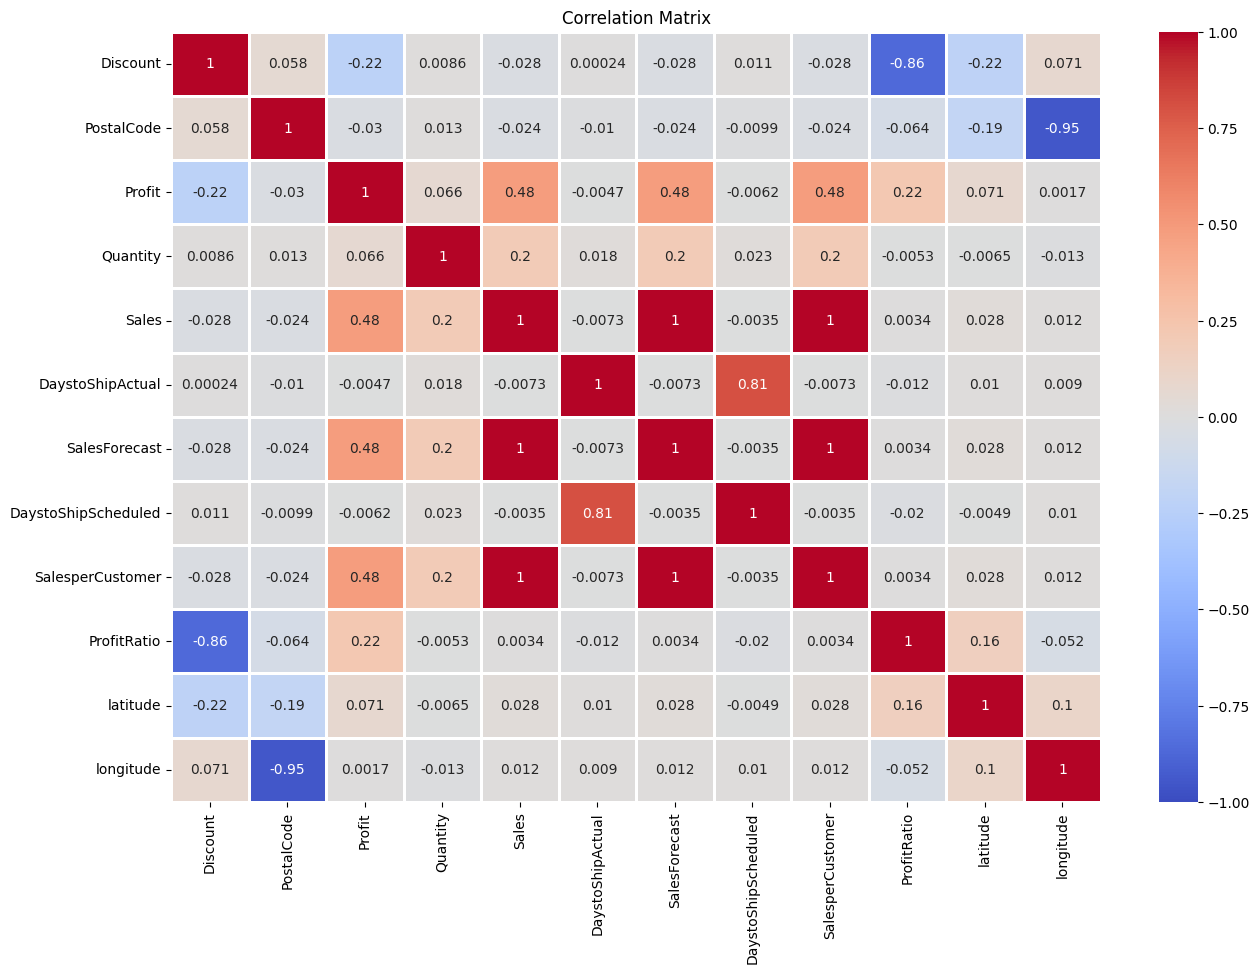

In [7]:
# Create a list of the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.9, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


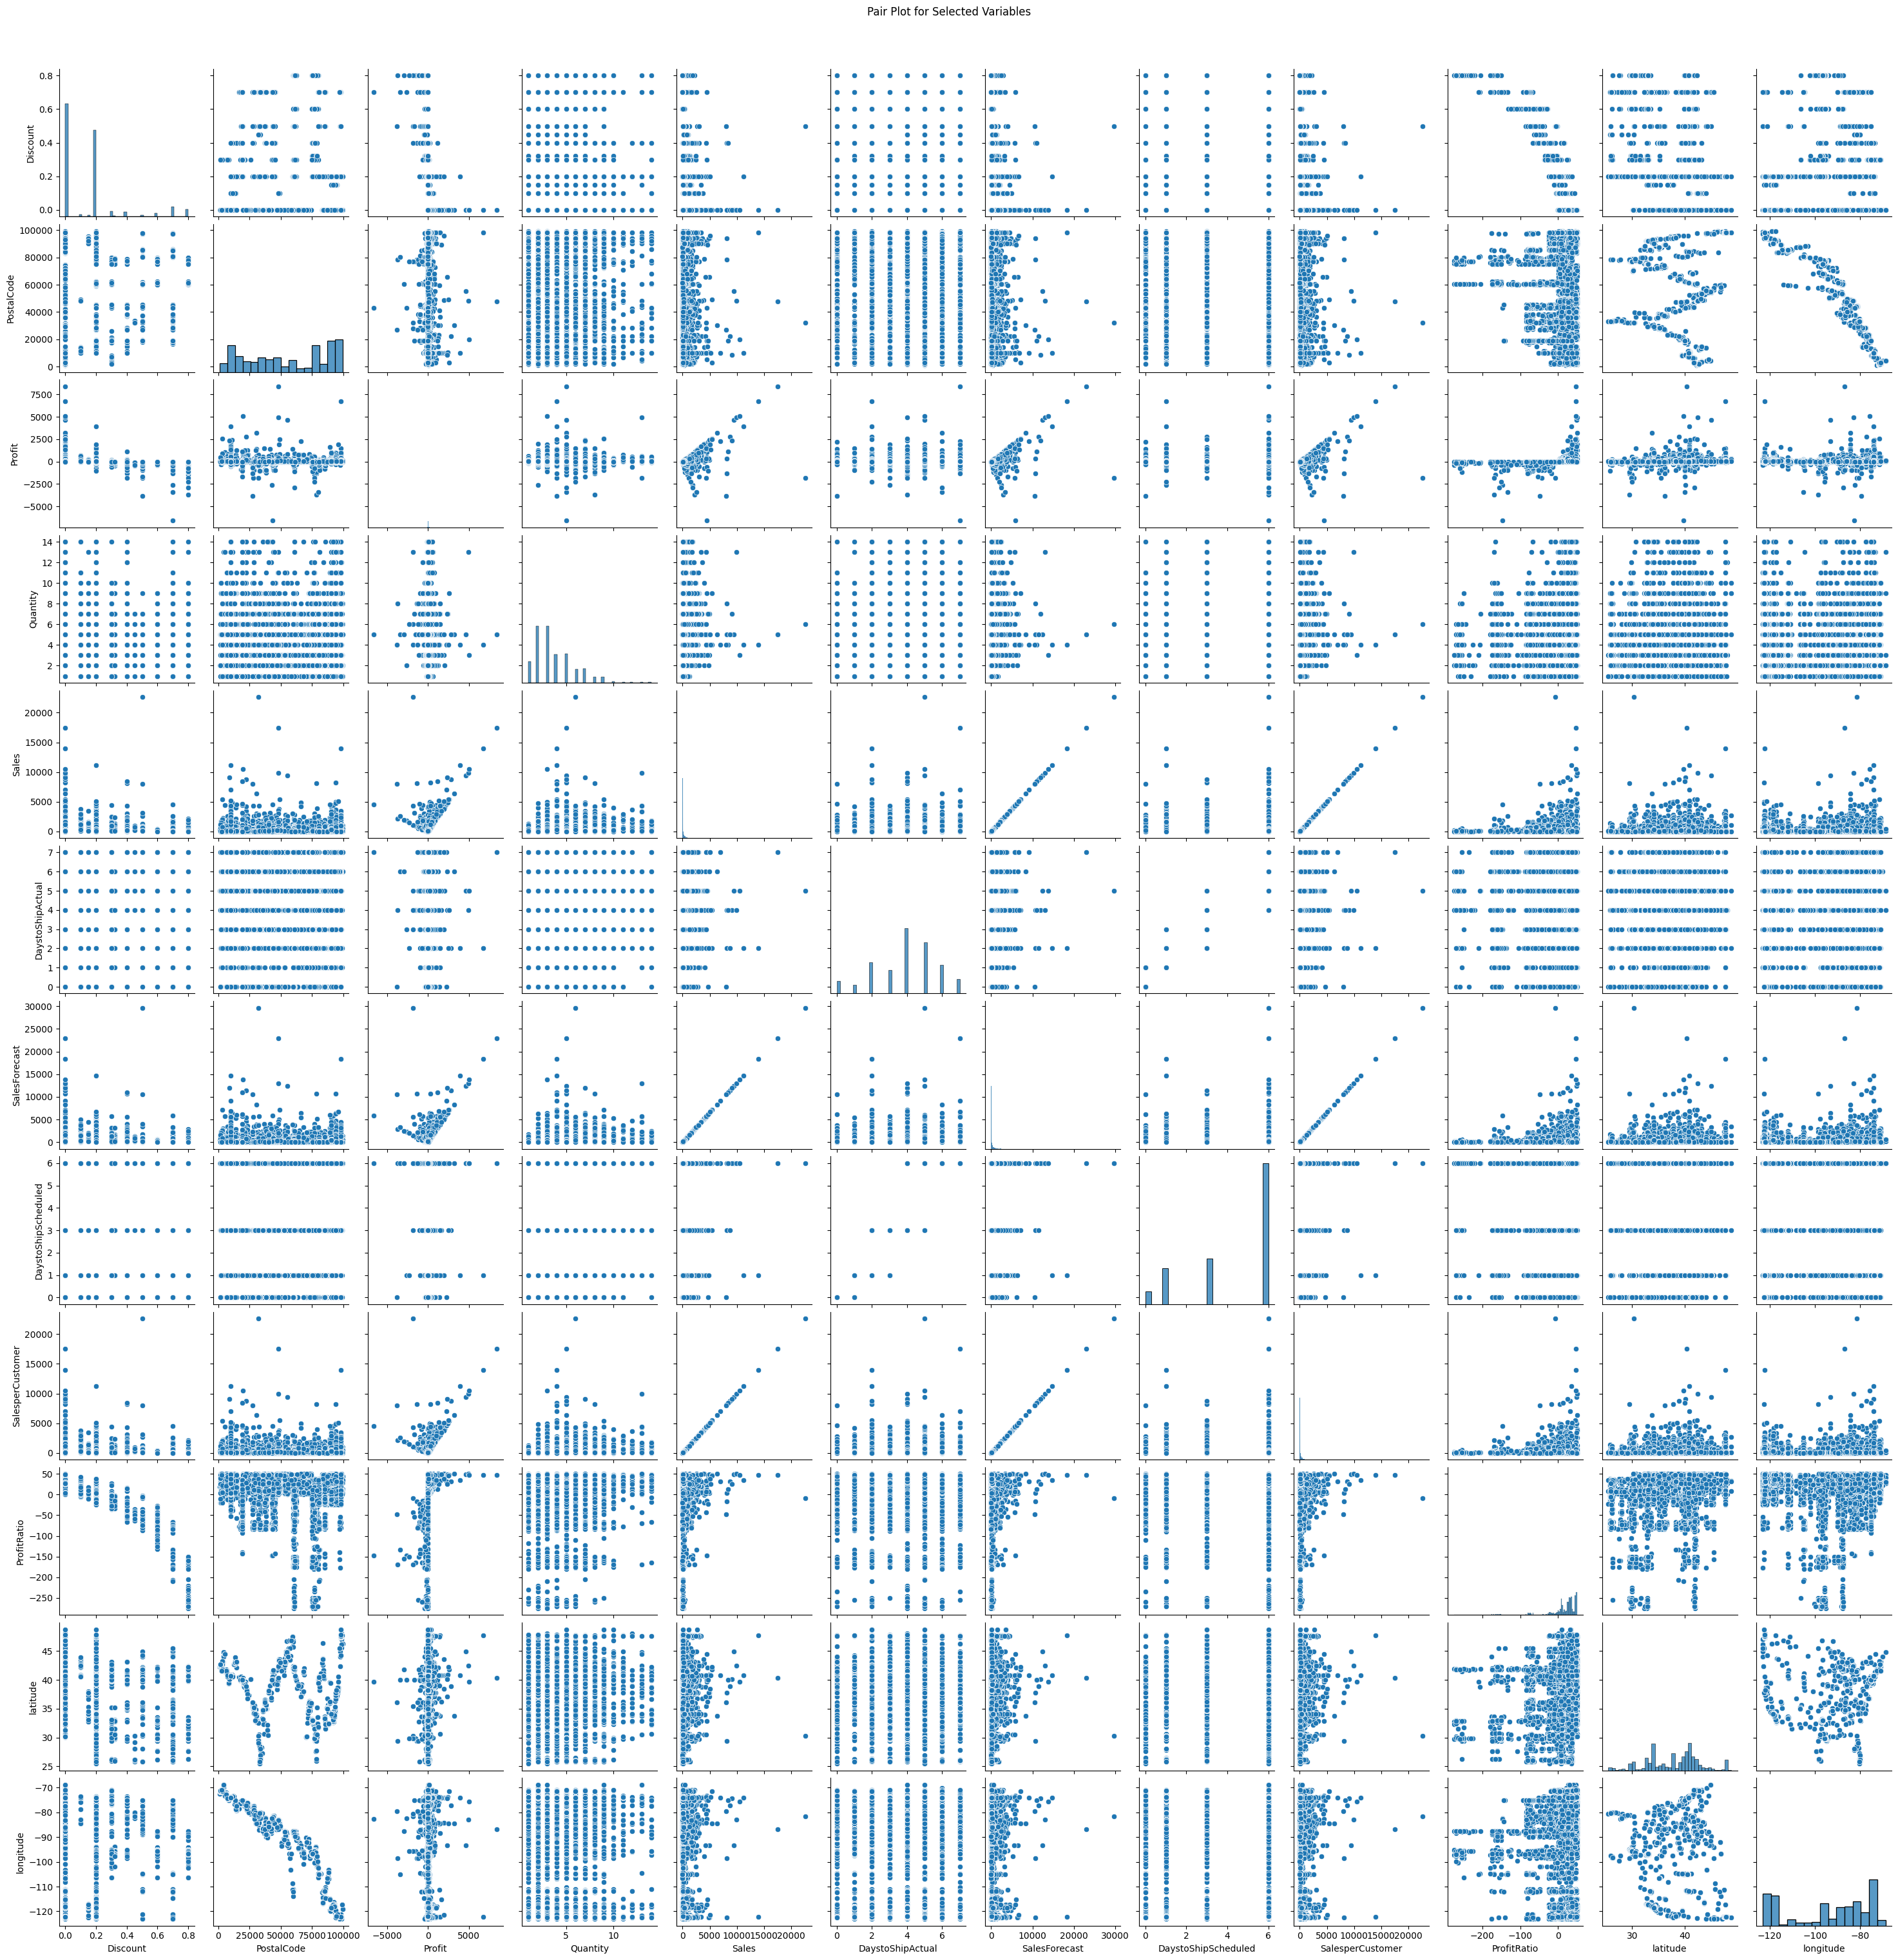

In [8]:
# Create a pair plot
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plot for Selected Variables", y=1.02)
plt.show()


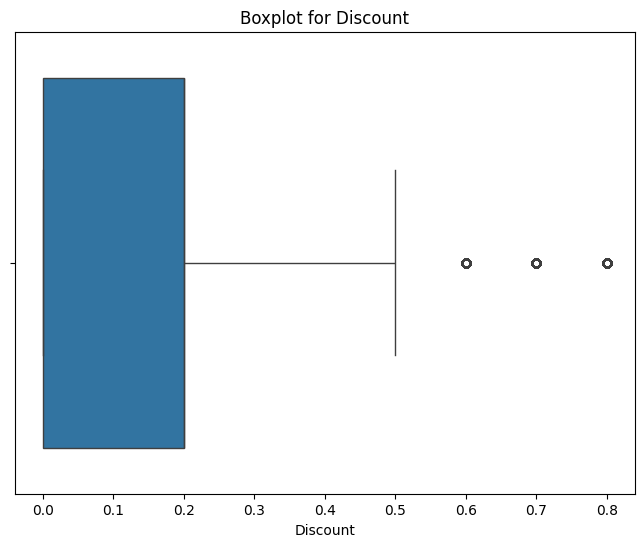

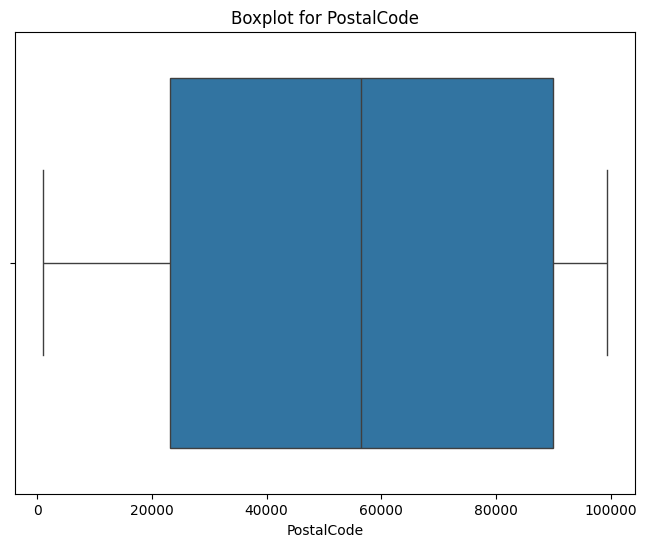

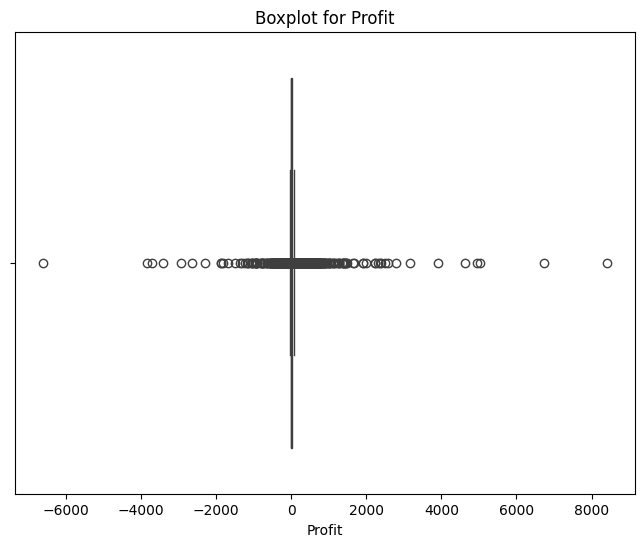

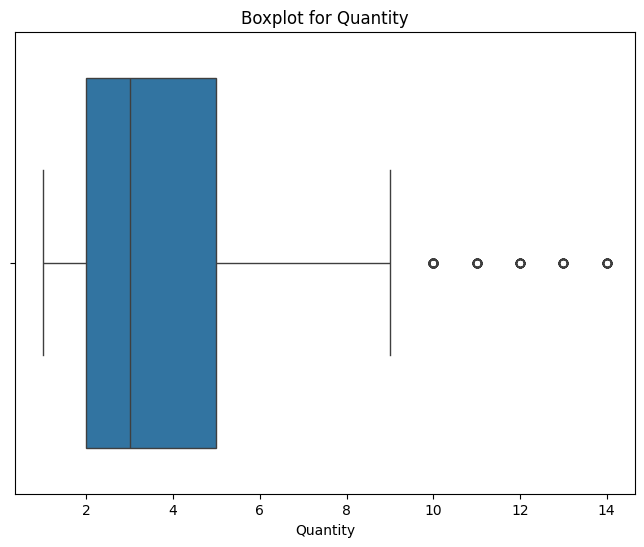

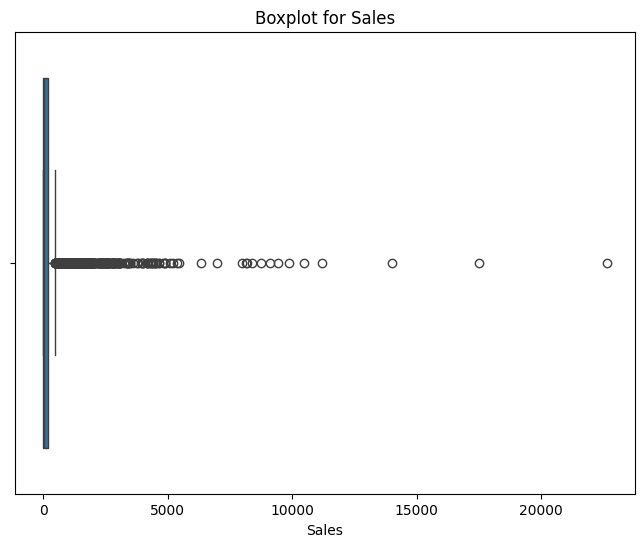

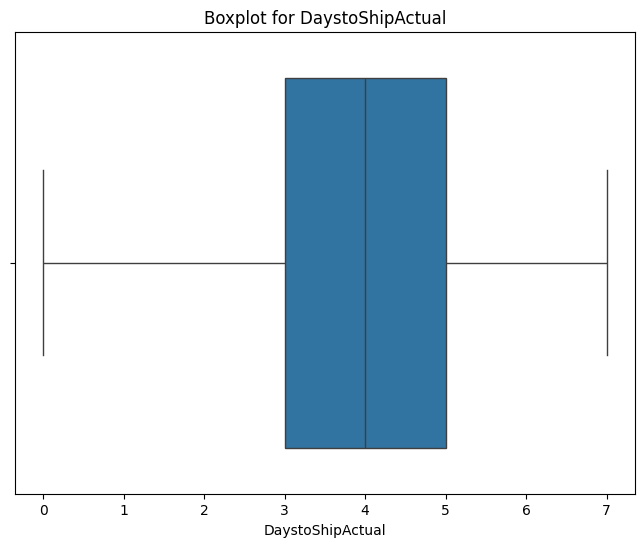

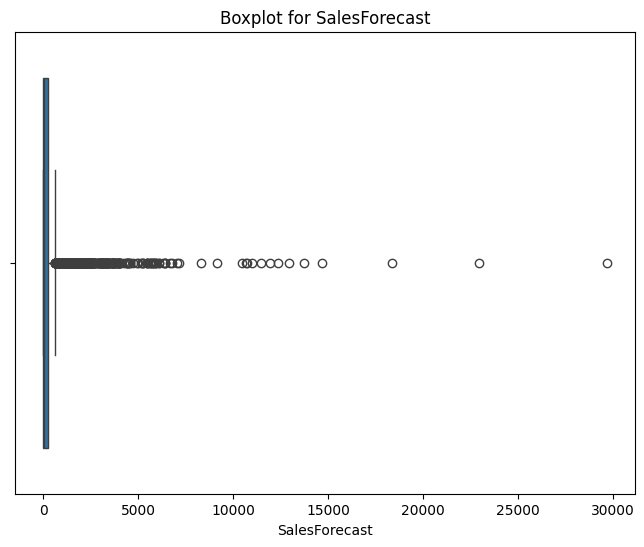

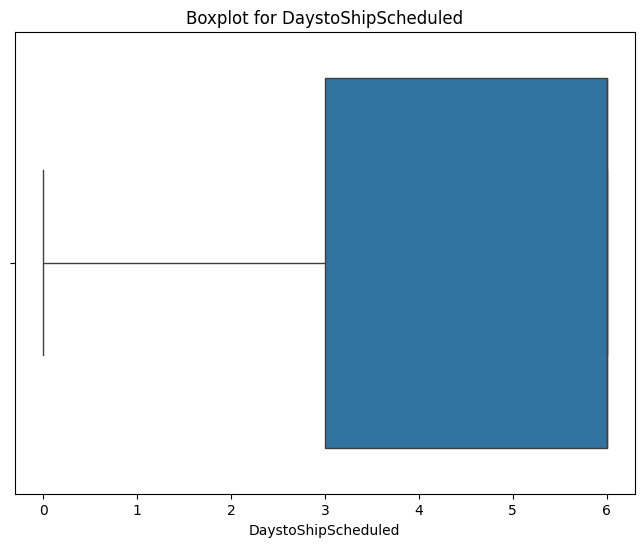

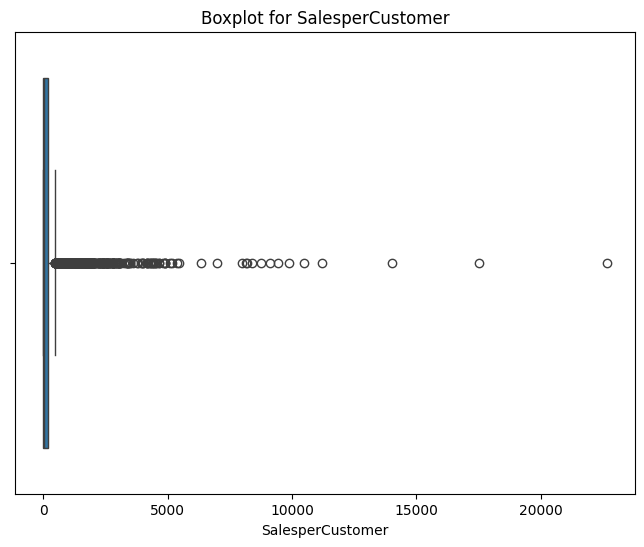

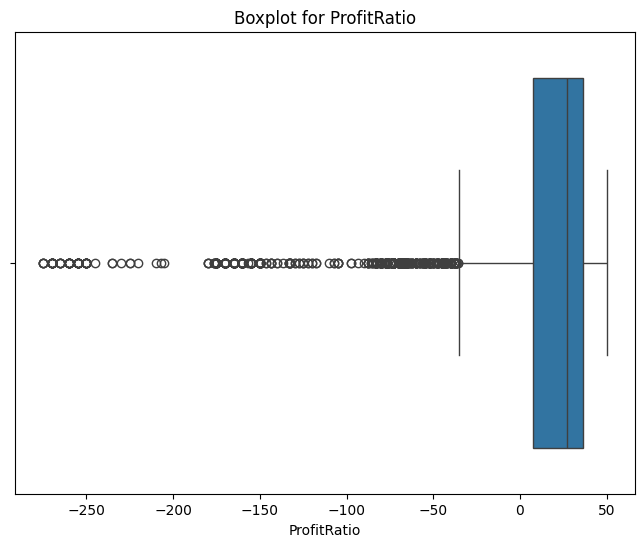

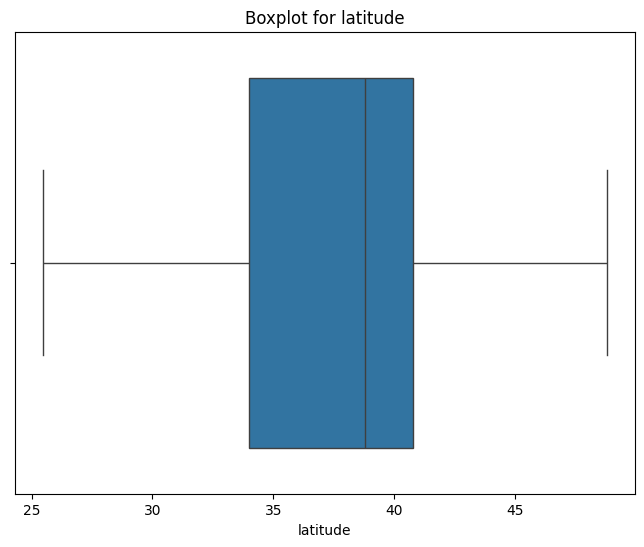

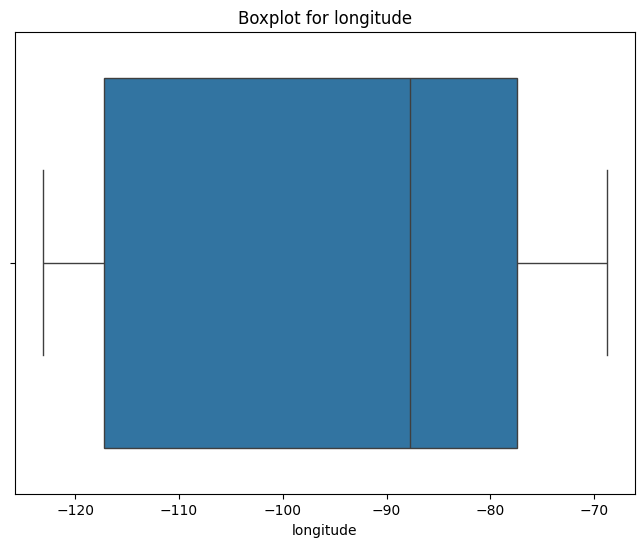

In [9]:
# Visualize outliers with box plots for numerical columns
for col in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
